# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
# carrega o arquivo .csv

df = pd.read_csv('sinasc_RO_2019.csv', na_values= ['na','9'])

df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5.0,1.0,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5.0,2.0,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,NaN,8 a 11 anos,513205.0,2.0,0.0,...,5.0,3.0,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4.0,4.0,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5.0,5.0,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [25]:
df['CONSULTAS']

0        4
1        4
2        4
3        3
4        4
        ..
27023    4
27024    4
27025    4
27026    4
27027    4
Name: CONSULTAS, Length: 27028, dtype: int64





####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.



In [3]:
df1 = df[['APGAR1', 'APGAR5', 'ESTCIVMAE','SEXO', 'GESTACAO']]

df1.head()

,APGAR1,APGAR5,ESTCIVMAE,SEXO,GESTACAO
0,9.0,10.0,5.0,Masculino,37 a 41 semanas
1,8.0,9.0,2.0,Feminino,37 a 41 semanas
2,8.0,10.0,9.0,Feminino,37 a 41 semanas
3,9.0,10.0,5.0,Feminino,37 a 41 semanas
4,8.0,10.0,2.0,Feminino,37 a 41 semanas


<AxesSubplot:xlabel='APGAR1', ylabel='Count'>

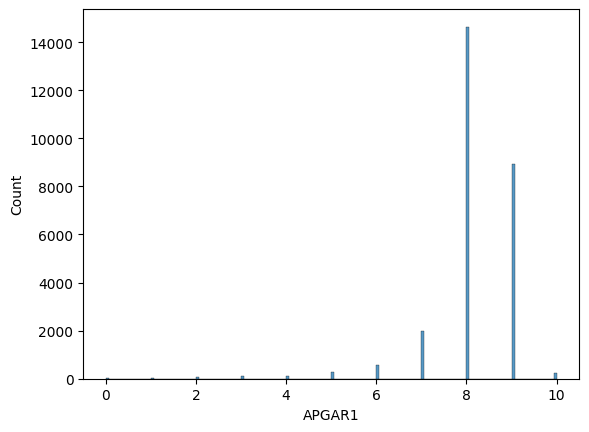

In [15]:
sns.histplot(df['APGAR1'])

<AxesSubplot:xlabel='APGAR5', ylabel='Count'>

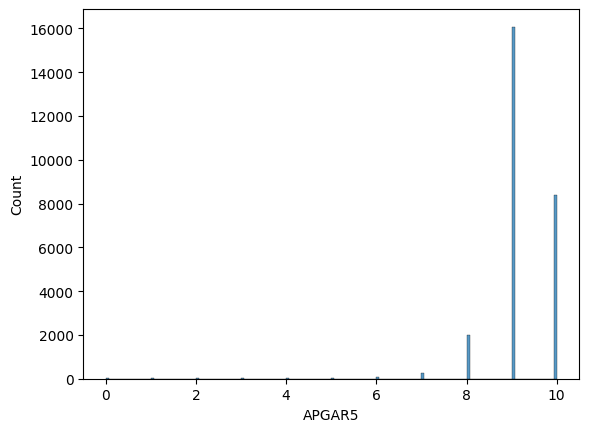

In [13]:
sns.histplot(df['APGAR5'])

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

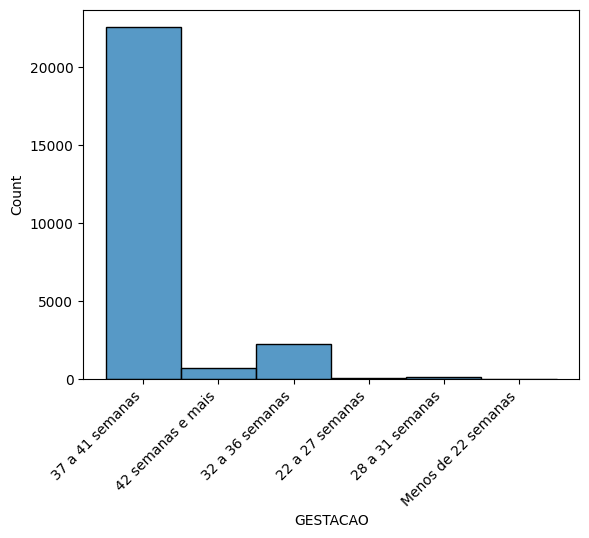

In [14]:
sns.histplot(df['GESTACAO'])
plt.xticks(rotation=45, ha='right')

<AxesSubplot:xlabel='SEXO', ylabel='Count'>

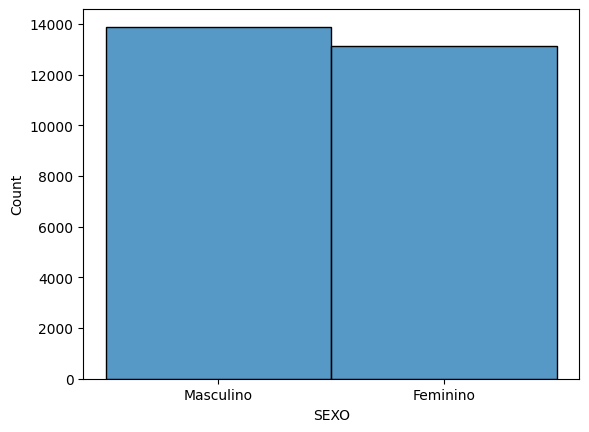

In [18]:
sns.histplot(df['SEXO'])

<AxesSubplot:xlabel='ESTCIVMAE', ylabel='Count'>

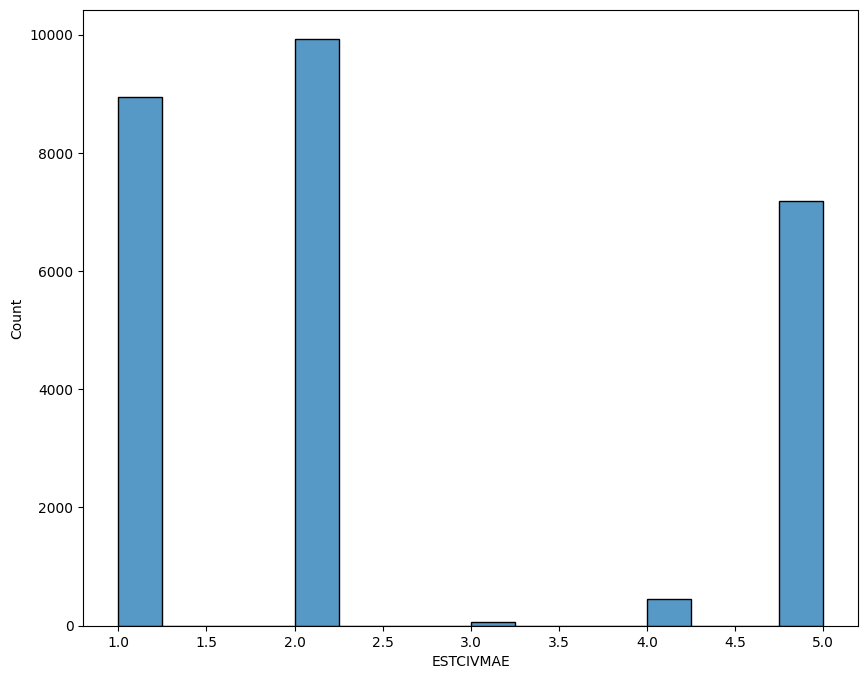

In [68]:
sns.histplot(df['ESTCIVMAE'])

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

In [35]:
df2 = df[['APGAR5', 'CONSULTAS']]
df2.head()

,APGAR5,CONSULTAS
0,10.0,4.0
1,9.0,4.0
2,10.0,4.0
3,10.0,3.0
4,10.0,4.0


In [36]:
df2.dropna(subset=['CONSULTAS'])

,APGAR5,CONSULTAS
0,10.0,4.0
1,9.0,4.0
2,10.0,4.0
3,10.0,3.0
4,10.0,4.0
...,...,...
27023,9.0,4.0
27024,9.0,4.0
27025,10.0,4.0
27026,9.0,4.0


In [37]:
# valores missing estraídos

df2['CONSULTAS'].value_counts()

4.0    18624
3.0     5988
2.0     1379
1.0      986
Name: CONSULTAS, dtype: int64

In [40]:
df_c1 = df2[df['CONSULTAS']==1.0]
df_c2 = df2[df['CONSULTAS']==2.0]
df_c3 = df2[df['CONSULTAS']==3.0]
df_c4 = df2[df['CONSULTAS']==4.0]

In [45]:
df_c1['APGAR5'].mean()
df_c2['APGAR5'].mean()
df_c3['APGAR5'].mean()
df_c4['APGAR5'].mean()

9.207187819443698

Text(0, 0.5, 'Média APGAR5')

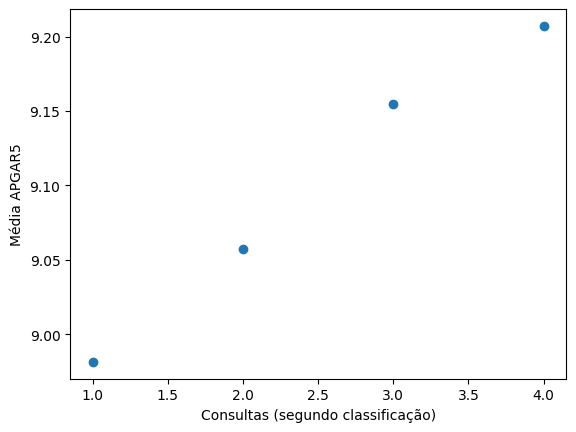

In [51]:
media_apgar5 = [df_c1['APGAR5'].mean(), df_c2['APGAR5'].mean(), df_c3['APGAR5'].mean(), df_c4['APGAR5'].mean()]
consultas = [1,2,3,4]

plt.scatter(consultas, media_apgar5)

plt.xlabel("Consultas (segundo classificação)")
plt.ylabel("Média APGAR5")

Conforme o número de consultas aumenta, segundo o critério exposto no PDF, APGAR5 é maior. Indicando que um maior acompanhamento tem benefícios na saúde da criança.

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

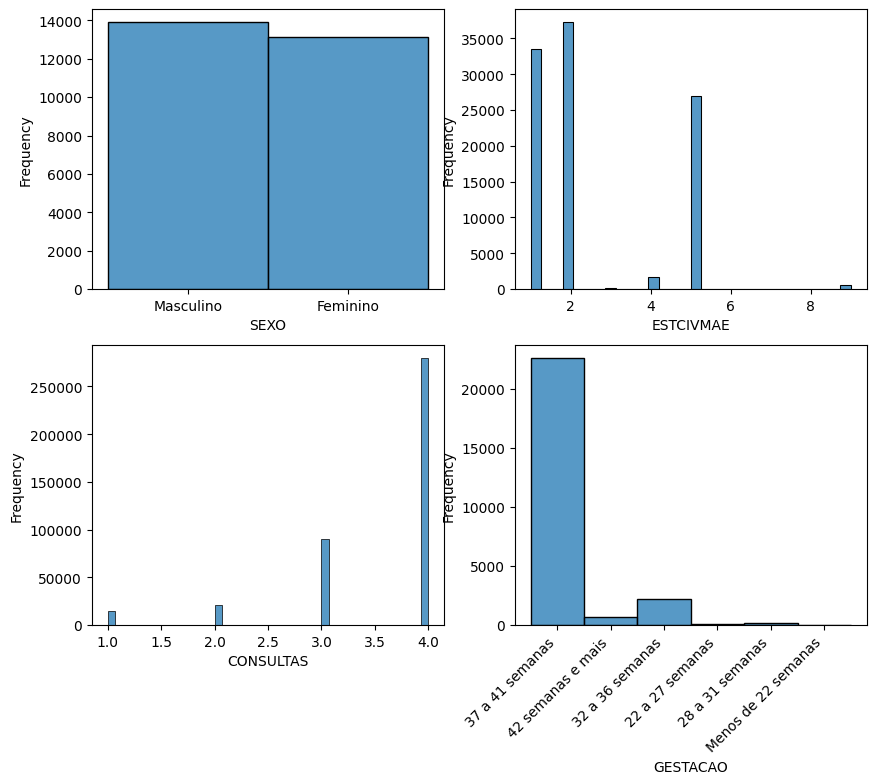

In [66]:
fig, axes = plt.subplots(2,2)

plt.rc('figure', figsize=(10, 8))

sns.histplot(ax = axes[0, 0], data=df1['SEXO'], stat='frequency'),
sns.histplot(ax = axes[0, 1], data=df1['ESTCIVMAE'], stat='frequency')
sns.histplot(ax = axes[1, 0], data=df['CONSULTAS'], stat='frequency')
sns.histplot(ax = axes[1, 1], data=df1['GESTACAO'], stat='frequency')

plt.xticks(rotation=45, ha='right')